# Part II - (Loan Analysis Presentation )
## by (Hanan Awad)

## Investigation Overview


The primary goal of this presentation is to provide a detailed analysis of loan data to understand various factors influencing loan amounts, borrower rates, and loan statuses. By examining these aspects, we aim to uncover patterns and insights that can help inform loan approval strategies and risk assessment.


## Dataset Overview and Executive Summary

The dataset used for this analysis contains information on loans, including loan amounts, borrower rates, APRs, loan statuses, and other related variables. The data provides a comprehensive view of lending behavior, borrower characteristics, and loan performance.
Key Insights
Loan Amount and Borrower Rate Relationship:

Higher loan amounts are associated with slightly higher borrower rates, indicating a correlation between loan size and perceived risk.
Impact of Loan Status:

Riskier loan statuses (e.g., defaulted, charged-off) are linked with higher borrower rates.
Completed loans generally have lower borrower rates, suggesting these are lower-risk loans.
Borrower Rate and APR Correlation:

A strong positive correlation exists between borrower rates and APRs, indicating that as borrower rates increase, APRs also rise proportionally.
Demographic and Risk Insights:

Preliminary analysis suggests that borrower demographics, such as credit scores and income, could further explain the observed loan behaviors and risks.
Summary of Findings
Loan Amounts: Most loans have lower borrower rates irrespective of the loan amount, though higher loan amounts tend to have slightly higher rates.
Loan Status: Completed and current loans show a wider distribution of rates, whereas riskier loans (defaulted, charged-off) have higher rates.
Rate and APR Correlation: The borrower rate and APR are linearly related, indicating consistent cost structures across different loans.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## (Visualization 1)

This histogram shows the distribution of loan amounts.

Observations:

The loan amounts are heavily skewed towards the lower end.
There are distinct peaks around $4,000, $10,000, and $15,000, indicating common loan amounts.
Very few loans exceed $20,000.
The plot is well-polished with clear axis labels and a title, making it easy to interpret the distribution of loan amounts across the dataset.

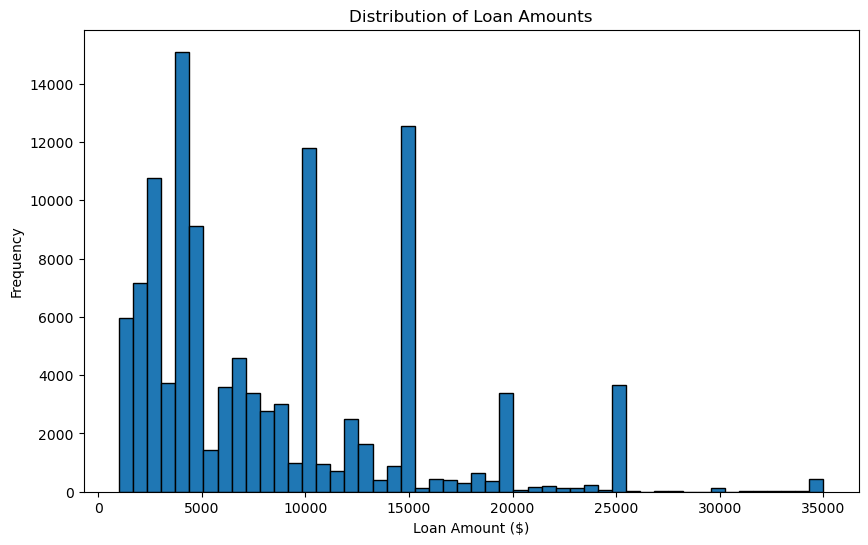

In [3]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['LoanOriginalAmount'], bins=50, edgecolor='k')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()

## (Visualization 2)

Description:
This bar chart shows the distribution of loan statuses across different Prosper ratings. Each bar represents a Prosper rating (A, AA, B, C, D, E, HR), and within each bar, different colors represent different loan statuses (Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, Past Due (1-15 days), Past Due (16-30 days), Past Due (31-60 days), Past Due (61-90 days), Past Due (91-120 days), Past Due (>120 days)).

Observations:

Current Loans: The green sections represent current loans. For most Prosper ratings (A, B, C, D, E, HR), the majority of loans are current, indicating that borrowers are making timely payments.
Completed Loans: The orange sections show completed loans. Prosper ratings with higher borrower creditworthiness (e.g., AA, A) have a larger proportion of completed loans compared to lower ratings (e.g., HR, E).
Chargedoff and Defaulted Loans: The blue and red sections represent charged-off and defaulted loans, respectively. Lower Prosper ratings (e.g., HR, E) have a higher proportion of charged-off and defaulted loans compared to higher ratings (e.g., AA, A).
Past Due Loans: The various shades of pink to blue represent loans that are past due. There are fewer loans in these categories, but they are more prevalent in lower Prosper ratings.
This visualization helps in understanding the distribution and performance of loans across different Prosper ratings, providing insights into the risk associated with each rating.



<Figure size 1400x700 with 0 Axes>

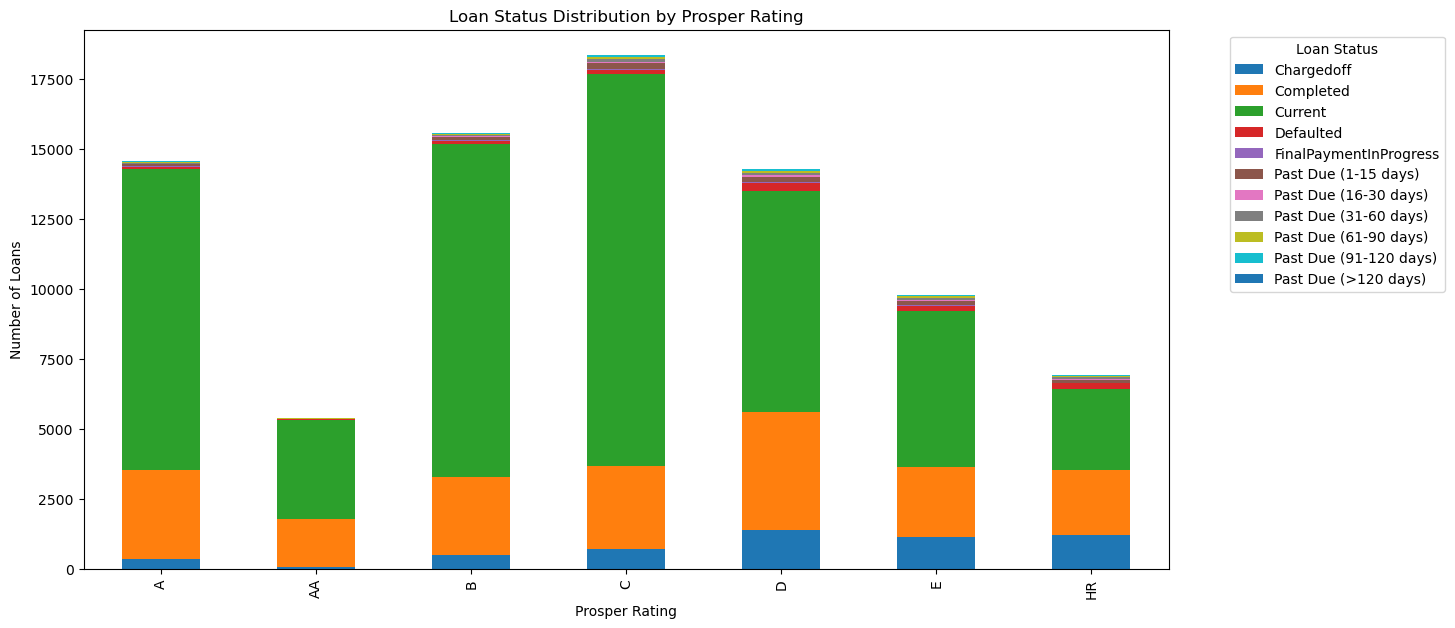

In [4]:
# Clustered bar chart
plt.figure(figsize=(14, 7))
loan_status_rating = df.groupby(['ProsperRating (Alpha)', 'LoanStatus']).size().unstack()
loan_status_rating.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Loan Status Distribution by Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## (Visualization 3)

This scatter plot matrix includes variables like BorrowerAPR, ProsperRating (numeric), and DebtToIncomeRatio. The matrix helps to understand the interactions between these variables. For instance, BorrowerAPR shows a wide range of values for each ProsperRating, suggesting that the rating does not directly predict the APR. Additionally, the DebtToIncomeRatio appears to have a higher density at lower values, indicating that most borrowers have a lower debt-to-income ratio. This visualization aids in identifying patterns and potential outliers within the dataset.catter plot matrix is well-executed and provides a comprehensive view of the relationships between multiple variables. The histograms along the diagonal effectively show the distribution of each variable, while the scatter plots in the off-diagonal spaces reveal potential correlations and patterns. This polished visualization is a valuable tool for identifying trends, outliers, and relationships within your dataset

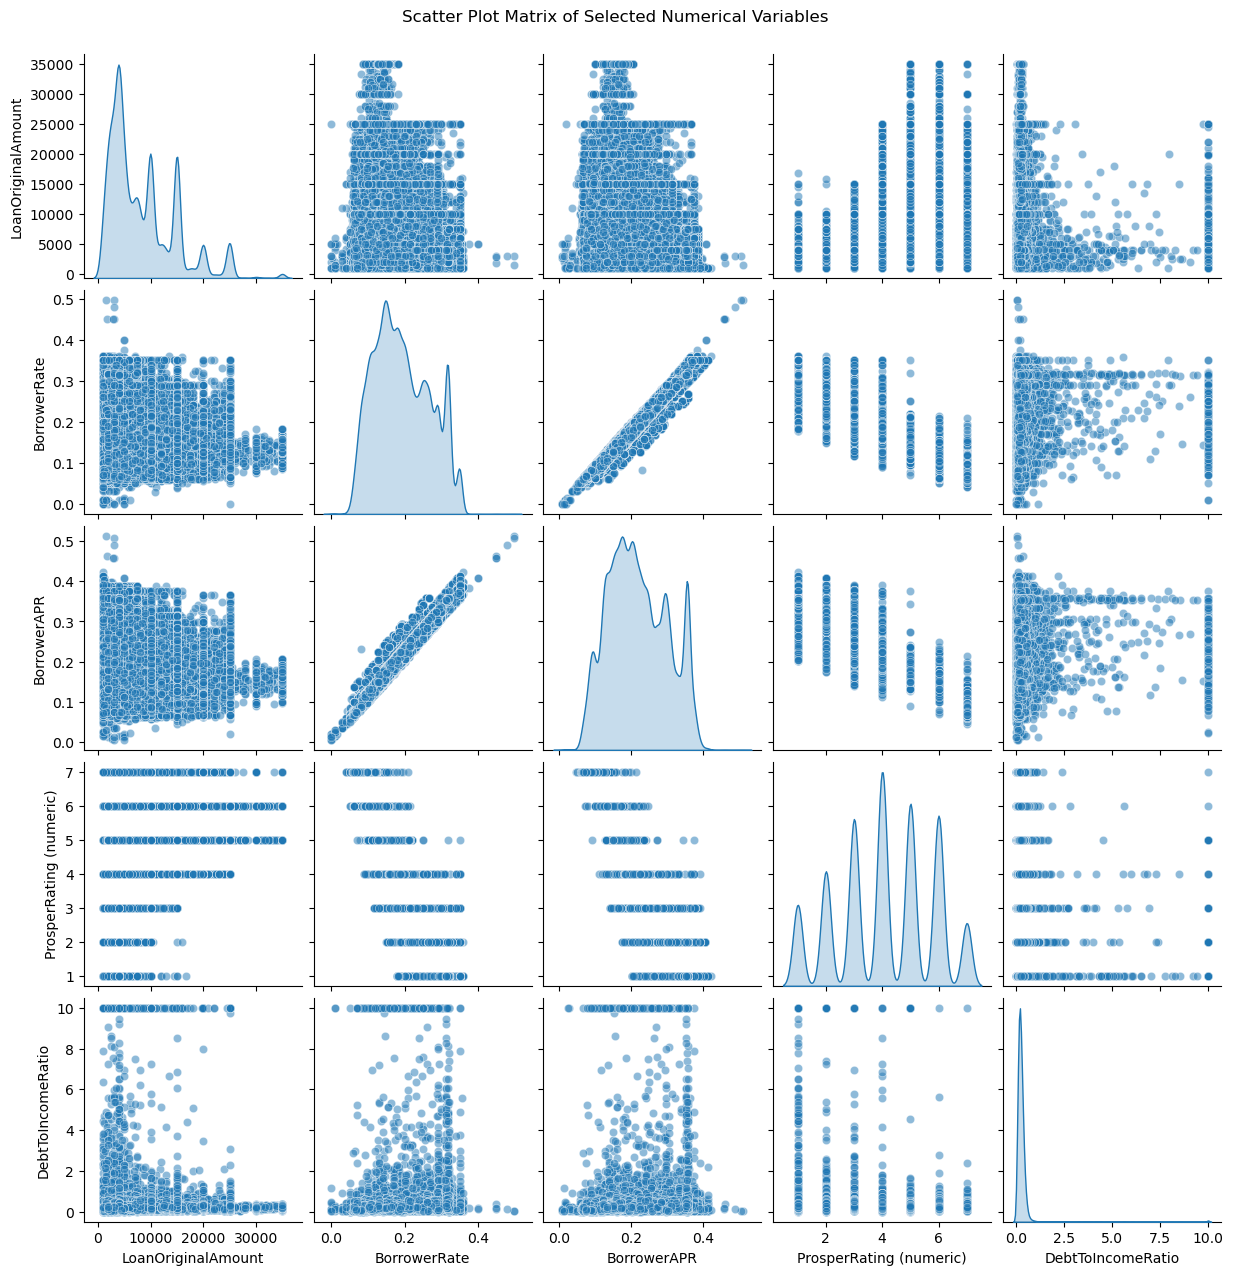

In [5]:
# Select a subset of numerical variables for the scatter plot matrix
subset = df[['LoanOriginalAmount', 'BorrowerRate', 'BorrowerAPR', 'ProsperRating (numeric)', 'DebtToIncomeRatio']]

# Create a scatter plot matrix
sns.pairplot(subset, diag_kind='kde', plot_kws={'alpha':0.5});
plt.suptitle('Scatter Plot Matrix of Selected Numerical Variables', y=1.02);
plt.show()